c:\users\thest\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


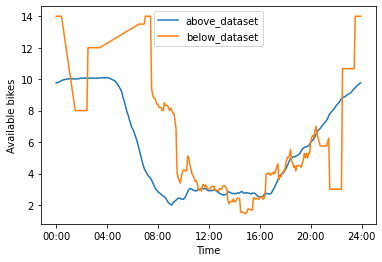

In [1]:
import pandas
import matplotlib.pyplot as plt
import math
import os
import numpy as np

import data_preprocessing
import warnings


def extract_date(x):
    return x.split(' ')[0]


def extract_year(x):
    return x.split(' ')[0].split('-')[0]


def plot_average_day_from_dataset(data, label=None):
    data['DATE'] = data['TIME'].apply(lambda x: extract_date(x))
    data['YEAR'] = data['TIME'].apply(lambda x: extract_year(x))

    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = data['int_time'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    for i, row in data.iterrows():
        time_total[row['int_time']] = time_total[row['int_time']] + row['AVAILABLE BIKES']
        time_count[row['int_time']] = time_count[row['int_time']] + 1

    averages = [x / y for x, y in zip(time_total.values(), time_count.values())]

    if label is not None:
        plt.plot(times, averages, label=label)
    else:
        plt.plot(times, averages)


def show_average_day_plot():
    plt.xlabel('Time')
    plt.ylabel('Available bikes')

    x = [0, 48, 96, 144, 192, 240, 288]
    labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
    plt.xticks(x, labels)

    # Comment this out to disable legend
    plt.legend()

    plt.show()


filename = './datasets/bss/dublin/reorg_plus_weather/station_2.csv'
threshold = 50
deciding_column = 'rhum'

dataset = pandas.read_csv(filename)




# dataset = dataset[dataset[deciding_column].str.strip().astype(bool)]

warnings.filterwarnings("ignore")
dataset[deciding_column] = dataset[deciding_column].astype('float64')
above_dataset = dataset.loc[dataset[deciding_column] >= threshold]

below_dataset = dataset.loc[dataset[deciding_column] < threshold]

plot_average_day_from_dataset(above_dataset, label="above_dataset")
plot_average_day_from_dataset(below_dataset, label="below_dataset")

show_average_day_plot()


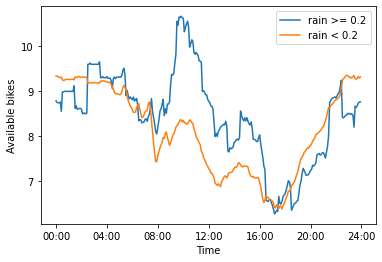

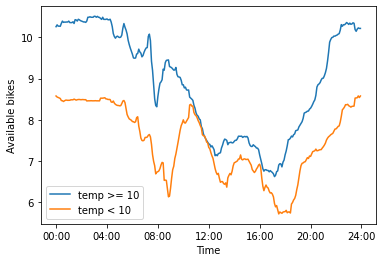

KeyboardInterrupt: 

In [3]:
import warnings

import pandas
import matplotlib.pyplot as plt
import math
import os
import numpy as np

import data_preprocessing


def plot_average_day_from_dataset(data, label=None):
    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = data['int_time'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    for i, row in data.iterrows():
        time_total[row['int_time']] = time_total[row['int_time']] + row['AVAILABLE BIKES']
        time_count[row['int_time']] = time_count[row['int_time']] + 1

    averages = [x / y for x, y in zip(time_total.values(), time_count.values())]

    if label is not None:
        plt.plot(times, averages, label=label)
    else:
        plt.plot(times, averages)


def show_average_day_plot():
    plt.xlabel('Time')
    plt.ylabel('Available bikes')

    x = [0, 48, 96, 144, 192, 240, 288]
    labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
    plt.xticks(x, labels)

    # Comment this out to disable legend
    plt.legend()

    plt.show()


def plot_average_day_by_condition(station):
    columns = {'rain': 0.2,
               'temp': 10,
               'rhum': 80
               }

    warnings.filterwarnings("ignore")
    filename = './datasets/bss/dublin/reorg_plus_weather/station_' + str(station) + '.csv'

    for col, threshold in columns.items():

        dataset = pandas.read_csv(filename)
        # x = dataset[deciding_column].unique()
        # x.sort()
        # for d in x:
        #     print(d)
        # exit(0)

        if col == 'rain':
            dataset = dataset[dataset[col].str.strip().astype(bool)]

        dataset[col] = dataset[col].astype('float64')
        above_dataset = dataset.loc[dataset[col] >= threshold]

        below_dataset = dataset.loc[dataset[col] < threshold]

        plot_average_day_from_dataset(above_dataset, label=col + " >= " + str(threshold))
        plot_average_day_from_dataset(below_dataset, label=col + " < " + str(threshold))

        show_average_day_plot()

plot_average_day_by_condition(4)